<a href="https://colab.research.google.com/github/Liqgy/6610412007/blob/main/Monsicha6610412007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pandas
!pip install numpy
!pip install requests
!pip install lxml
!pip install yfinance

In [5]:
import yfinance as yf
import numpy as np
import pandas as pd

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [6]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4500    0  4500    0     0  15093      0 --:--:-- --:--:-- --:--:-- 15100
100  517k  100  517k    0     0   786k      0 --:--:-- --:--:-- --:--:-- 3977k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4500    0  4500    0     0  20573      0 --:--:-- --:--:-- --:--:-- 20642
100  392k  100  392k    0     0   839k      0 --:--:-- --:--:-- --:--:--  839k


In [7]:
# Technical Indicators
import talib as ta
# Plotting graphs
import matplotlib.pyplot as plt
# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [8]:
cbg= yf.Ticker('cbg.bk')
interval = '1h'
start = '2023-2-10'
end = '2024-2-10'
df = cbg.history(interval=interval,start=start,end=end)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-02-10 10:00:00+07:00,100.00,100.50,99.75,100.00,0,0.0,0.0
2023-02-10 11:00:00+07:00,100.00,100.50,100.00,100.50,171952,0.0,0.0
2023-02-10 12:00:00+07:00,100.50,100.50,100.00,100.50,6901,0.0,0.0
2023-02-10 14:00:00+07:00,100.00,100.50,100.00,100.00,163604,0.0,0.0
2023-02-10 15:00:00+07:00,100.00,100.50,100.00,100.50,205727,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-09 11:00:00+07:00,72.50,72.75,72.25,72.25,745468,0.0,0.0
2024-02-09 12:00:00+07:00,72.25,72.25,72.00,72.25,194300,0.0,0.0
2024-02-09 14:00:00+07:00,72.25,72.50,72.00,72.25,81535,0.0,0.0


In [9]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.iloc[:,:12]

In [10]:
X

,Open,High,Low,Close,Volume,Dividends,Stock Splits,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,,,,
2023-02-15 10:00:00+07:00,100.50,101.00,99.50,100.00,0,0.0,0.0,100.825,0.180003,43.846188,0.75,0.50
2023-02-15 11:00:00+07:00,100.50,100.50,99.50,99.75,215583,0.0,0.0,100.700,0.430783,40.680869,0.50,0.00
2023-02-15 12:00:00+07:00,99.75,99.75,99.50,99.75,17759,0.0,0.0,100.575,0.594532,40.680869,0.00,-0.75
2023-02-15 14:00:00+07:00,99.75,100.00,99.25,99.25,264952,0.0,0.0,100.350,0.762892,34.526505,0.00,0.00
2023-02-15 15:00:00+07:00,99.25,99.50,99.25,99.25,424418,0.0,0.0,100.125,0.821181,34.526505,0.00,-0.50
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-09 11:00:00+07:00,72.50,72.75,72.25,72.25,745468,0.0,0.0,72.350,0.735111,37.084100,0.00,0.50
2024-02-09 12:00:00+07:00,72.25,72.25,72.00,72.25,194300,0.0,0.0,72.275,0.606346,37.084100,0.00,-0.25
2024-02-09 14:00:00+07:00,72.25,72.50,72.00,72.25,81535,0.0,0.0,72.175,0.186120,37.084100,0.00,0.00


In [11]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)
#shift-1 for shift up to tomorrow close price

In [12]:
split = int(0.7*len(df))
#train70% และ test 30%
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [13]:
model = LogisticRegression()
model = model.fit(X_train,y_train)

In [14]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[-0.001549006046830422]
1,High,[-0.0015540106848044464]
2,Low,[-0.0015438933186894376]
3,Close,[-0.0015511211876958933]
4,Volume,[-3.7299947192512996e-08]
5,Dividends,[-1.1811780409332056e-07]
6,Stock Splits,[0.0]
7,S_10,[-0.001553926267046872]
8,Corr,[-6.494045501002103e-06]
9,RSI,[-0.0008131905183061224]


In [15]:
probability = model.predict_proba(X_test)
print(probability)

[[0.63972005 0.36027995]
 [0.63148931 0.36851069]
 [0.6424469  0.3575531 ]
 [0.6307086  0.3692914 ]
 [0.63277726 0.36722274]
 [0.63585493 0.36414507]
 [0.63396514 0.36603486]
 [0.6302872  0.3697128 ]
 [0.63539516 0.36460484]
 [0.63110703 0.36889297]
 [0.63413634 0.36586366]
 [0.65744291 0.34255709]
 [0.64546512 0.35453488]
 [0.6356723  0.3643277 ]
 [0.63861282 0.36138718]
 [0.63635465 0.36364535]
 [0.64036516 0.35963484]
 [0.64007459 0.35992541]
 [0.63803559 0.36196441]
 [0.63937526 0.36062474]
 [0.64640194 0.35359806]
 [0.64021765 0.35978235]
 [0.64471061 0.35528939]
 [0.65374176 0.34625824]
 [0.64556629 0.35443371]
 [0.64177306 0.35822694]
 [0.67579199 0.32420801]
 [0.65472745 0.34527255]
 [0.65669501 0.34330499]
 [0.65778403 0.34221597]
 [0.6570351  0.3429649 ]
 [0.64812842 0.35187158]
 [0.65513708 0.34486292]
 [0.65097122 0.34902878]
 [0.65317045 0.34682955]
 [0.65796588 0.34203412]
 [0.6534433  0.3465567 ]
 [0.64958287 0.35041713]
 [0.65776632 0.34223368]
 [0.65342116 0.34657884]


In [18]:
predicted = model.predict(X_test)
print(predicted)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

In [19]:
df_test_predicted = X_test.copy()
df_test_predicted['Predicted'] = predicted
buying_dates = df_test_predicted[df_test_predicted['Predicted'] == 1].index
print(buying_dates)

DatetimeIndex([], dtype='datetime64[ns, Asia/Bangkok]', name='Datetime', freq=None)


In [20]:
print(metrics.confusion_matrix(y_test, predicted))

[[275   0]
 [158   0]]


In [21]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.64      1.00      0.78       275
           1       0.00      0.00      0.00       158

    accuracy                           0.64       433
   macro avg       0.32      0.50      0.39       433
weighted avg       0.40      0.64      0.49       433



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-22-faae3d2ac232>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Signal'] = model.predict(X)
<ipython-input-22-faae3d2ac232>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cbg_returns'] = np.log(df['Close']/df['Close'].shift(1))
<ipython-input-22-faae3d2ac232>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

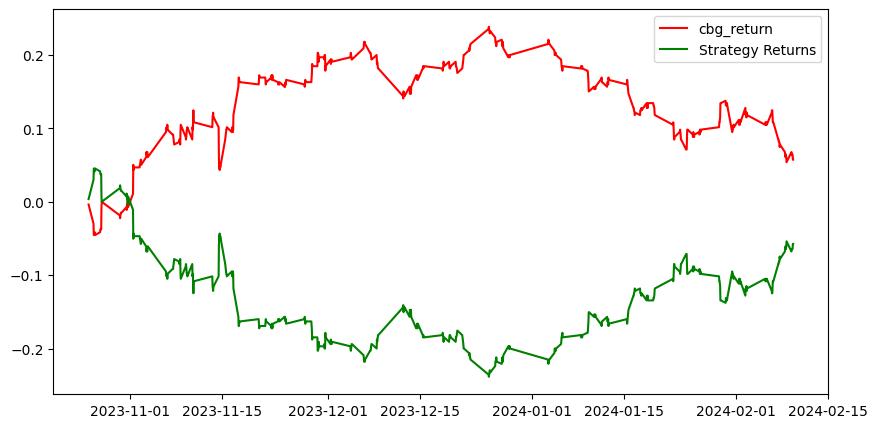

In [22]:
df['Predicted_Signal'] = model.predict(X)
df['cbg_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_cbg_returns = np.cumsum(df[split:]['cbg_returns'])


df['Strategy_returns'] = df['cbg_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Strategy_returns'])
plt.figure(figsize=(10,5))
plt.plot(Cumulative_cbg_returns, color='r', label = 'cbg_return')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [23]:
osp= yf.Ticker('osp.bk')
interval = '1h'
start = '2023-2-10'
end = '2024-2-10'
df2 = osp.history(interval=interval,start=start,end=end)
df2

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-02-10 10:00:00+07:00,28.750000,28.750000,28.250000,28.500000,0,0.0,0.0
2023-02-10 11:00:00+07:00,28.250000,28.500000,28.250000,28.250000,49487,0.0,0.0
2023-02-10 12:00:00+07:00,28.250000,28.500000,28.250000,28.500000,9716,0.0,0.0
2023-02-10 14:00:00+07:00,28.250000,28.500000,28.250000,28.500000,27450,0.0,0.0
2023-02-10 15:00:00+07:00,28.250000,28.500000,28.250000,28.250000,234847,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-09 11:00:00+07:00,20.799999,20.900000,20.700001,20.799999,451036,0.0,0.0
2024-02-09 12:00:00+07:00,20.799999,20.799999,20.700001,20.799999,141000,0.0,0.0
2024-02-09 14:00:00+07:00,20.799999,20.900000,20.700001,20.799999,161600,0.0,0.0


In [24]:
df2['S_10'] = df2['Close'].rolling(window=10).mean()
df2['Corr'] = df2['Close'].rolling(window=10).corr(df2['S_10'])
df2['RSI'] = ta.RSI(np.array(df2['Close']), timeperiod =10)
df2['Open-Close'] = df2['Open'] - df2['Close'].shift(1)
df2['Open-Open'] = df2['Open'] - df2['Open'].shift(1)
df2 = df2.dropna()
X2 = df2.iloc[:,:15]
X2

,Open,High,Low,Close,Volume,Dividends,Stock Splits,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,,,,
2023-02-15 10:00:00+07:00,28.250000,28.500000,28.000000,28.250000,0,0.0,0.0,28.325,0.717002,41.467577,0.000000,0.000000
2023-02-15 11:00:00+07:00,28.250000,28.250000,28.000000,28.000000,126480,0.0,0.0,28.275,0.824154,30.563148,0.000000,0.000000
2023-02-15 12:00:00+07:00,28.250000,28.250000,28.000000,28.250000,173710,0.0,0.0,28.250,0.653876,46.263828,0.250000,0.000000
2023-02-15 14:00:00+07:00,28.000000,28.750000,28.000000,28.500000,3715850,0.0,0.0,28.250,-0.111803,57.053609,-0.250000,-0.250000
2023-02-15 15:00:00+07:00,28.500000,28.500000,28.250000,28.500000,744875,0.0,0.0,28.275,-0.257513,57.053609,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-09 11:00:00+07:00,20.799999,20.900000,20.700001,20.799999,451036,0.0,0.0,21.010,0.977081,30.650268,0.000000,-0.200001
2024-02-09 12:00:00+07:00,20.799999,20.799999,20.700001,20.799999,141000,0.0,0.0,20.970,0.954805,30.650268,0.000000,0.000000
2024-02-09 14:00:00+07:00,20.799999,20.900000,20.700001,20.799999,161600,0.0,0.0,20.930,0.909839,30.650268,0.000000,0.000000
